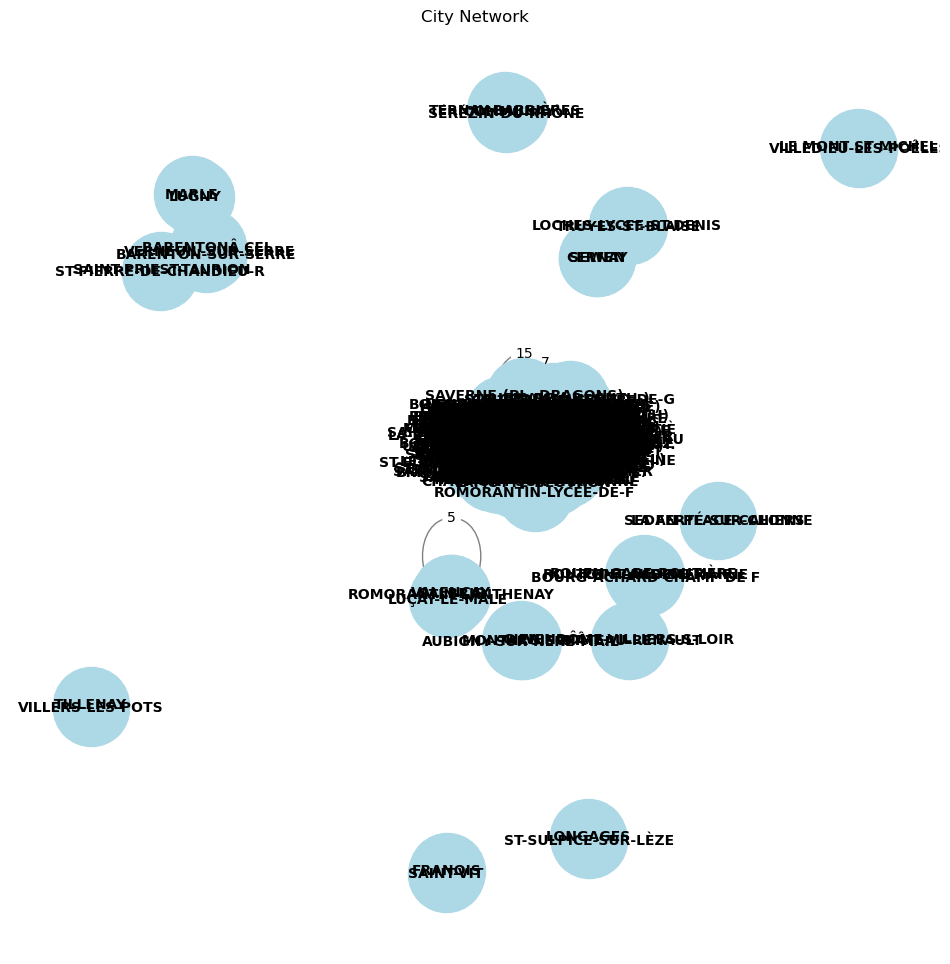

Enter a starting city:
Enter an ending city:
Shortest path from PARIS to MARSEILLE: ['PARIS', 'SAINT-PIERRE-DES-CORPS', 'JOUE-LES-TOURS', 'CHOUZÉ-SUR-LOIRE', 'NARBONNE', 'MARSEILLE']
Total duration: 490 minutes


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import pyarrow.parquet as pq
from typing import Union


def load_graph_from_parquet(parquet_path: str) -> nx.Graph:
    """Load the graph from the Parquet file."""
    graph_df = pd.read_parquet(parquet_path)
    
    G = nx.Graph()
    
    for _, row in graph_df.iterrows():
        city_from = row['city_from']
        city_to = row['city_to']
        distance = row['distance']
        
        # Add both directions to the graph
        G.add_edge(city_from, city_to, weight=distance)
    
    return G


def find_shortest_path(graph: nx.Graph, start: str, end: str) -> dict:
    """Find the shortest path using Dijkstra's algorithm."""
    try:
        # Using NetworkX's built-in function to find the shortest path
        length, path = nx.single_source_dijkstra(graph, source=start, target=end)
        return {
            'path': path,
            'total_duration': length
        }
    except nx.NetworkXNoPath:
        return {
            'path': ["No path found"],
            'total_duration': None
        }


def visualize_graph(graph: nx.Graph) -> None:
    """Visualize the graph using matplotlib."""
    plt.figure(figsize=(12, 12))
    
    pos = nx.spring_layout(graph, seed=42)
    plt.title("City Network")

    # Draw the graph
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')

    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    plt.show()


def main():
    # Path to the parquet file containing the graph data
    parquet_path = r"C:\Users\vikne\Documents\Master 2\Semestre 9\Intelligence artificielle\Travel-Order-Resolver\ai\path_algorithm\dataset\graph.parquet"
    
    # Load the graph from the parquet file
    graph = load_graph_from_parquet(parquet_path)
    
    # Visualize the graph
    visualize_graph(graph)
    
    # User input for testing the shortest path
    print("Enter a starting city:")
    start_city = input().strip()
    
    print("Enter an ending city:")
    end_city = input().strip()
    
    # Find the shortest path between the two cities
    result = find_shortest_path(graph, start_city, end_city)
    
    # Output the results
    if result['path'][0] == "No path found":
        print(f"No path found between {start_city} and {end_city}.")
    else:
        print(f"Shortest path from {start_city} to {end_city}: {result['path']}")
        print(f"Total duration: {result['total_duration']} minutes")


if __name__ == "__main__":
    main()